### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import pathlib

from joblib import load

import matplotlib.pyplot as plt
import seaborn as sns

### Interpret best model

In [2]:
model_dir = pathlib.Path("../2.train_model/models/")

log_reg_model_path = pathlib.Path(f"{model_dir}/log_reg_model.joblib")
log_reg_model = load(log_reg_model_path)

### Compile Coefficients Matrix

In [3]:
coefs = np.abs(log_reg_model.coef_)
coefs = pd.DataFrame(coefs).T
coefs.columns = log_reg_model.classes_

print(coefs.shape)
coefs.head()

(1280, 17)


,ADCCM,Anaphase,Apoptosis,Artefact,Binuclear,Elongated,Folded,Grape,Hole,Interphase,Large,Metaphase,MetaphaseAlignment,OutOfFocus,Polylobed,Prometaphase,SmallIrregular
0,0.039976,0.000834,0.042843,0.011814,0.013417,0.015871,0.003852,0.022666,0.022400,0.162673,0.050743,0.066027,0.090861,0.018624,0.014632,0.004950,0.142476
1,0.018568,0.001750,0.000274,0.018116,0.033405,0.017644,0.055129,0.011102,0.011466,0.002536,0.037100,0.037173,0.004369,0.002920,0.009258,0.001001,0.035398
2,0.088846,0.022106,0.035342,0.088414,0.022811,0.045928,0.036346,0.039235,0.013380,0.061162,0.015542,0.002870,0.022667,0.005025,0.049963,0.085754,0.041397
3,0.035772,0.000897,0.044926,0.049447,0.107581,0.059435,0.004145,0.011831,0.052242,0.119844,0.015909,0.013171,0.023090,0.003101,0.010850,0.020800,0.055792
4,0.000963,0.025398,0.037626,0.017511,0.071511,0.016610,0.004159,0.016140,0.025183,0.045763,0.004441,0.050932,0.001639,0.025447,0.017901,0.000183,0.034149


### Diagrams for interpreting coefficients

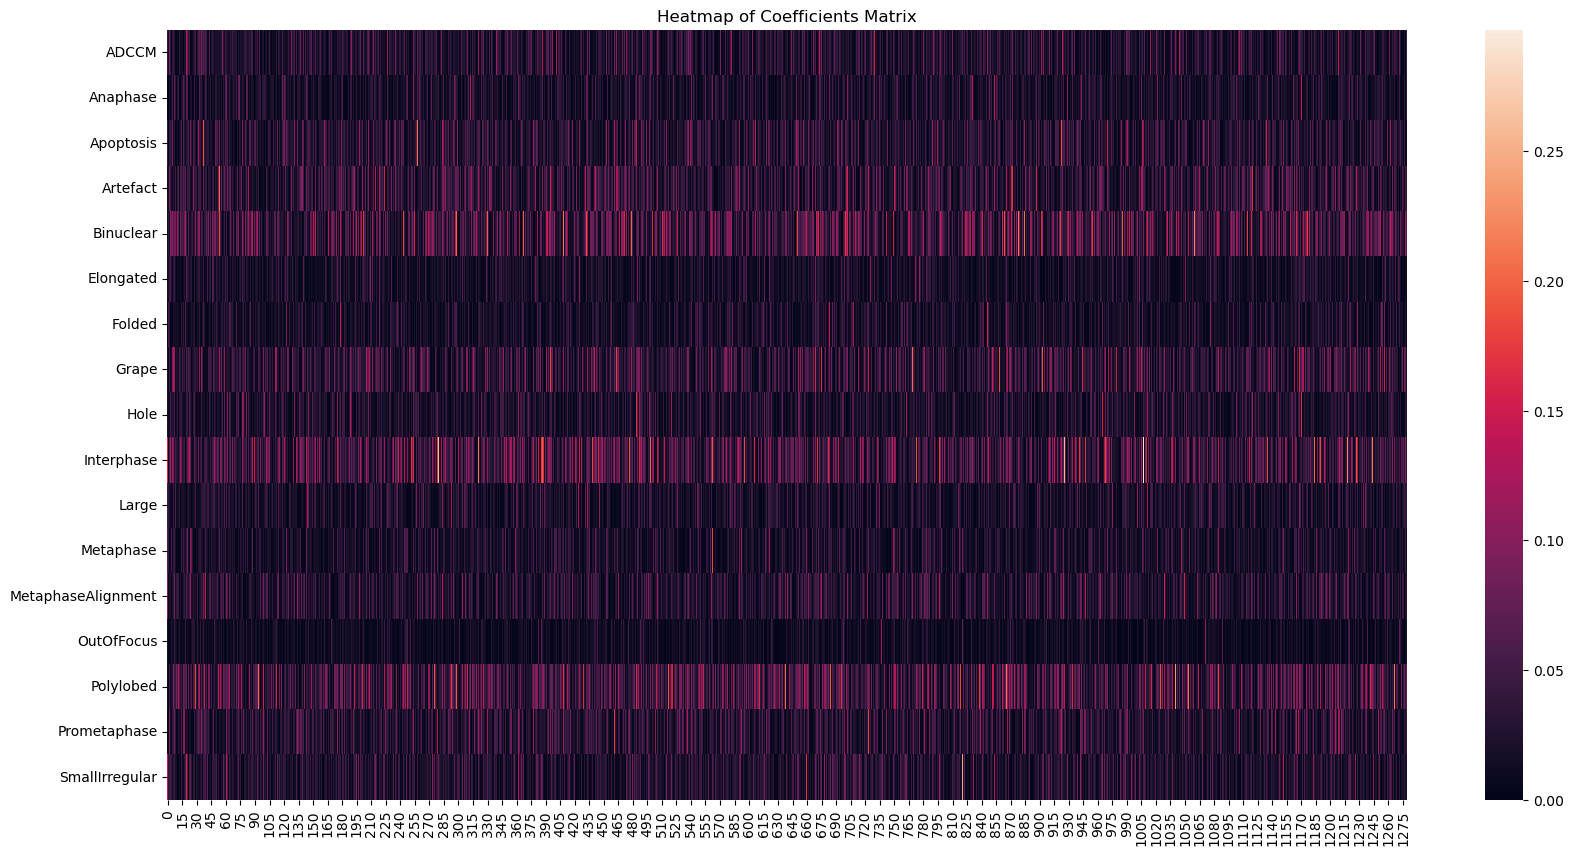

In [4]:
# display heatmap of average coefs
plt.figure(figsize=(20, 10))
plt.title("Heatmap of Coefficients Matrix")
ax = sns.heatmap(data=coefs.T)

/home/roshankern/anaconda3/envs/phenotypic_profiling/lib/python3.8/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


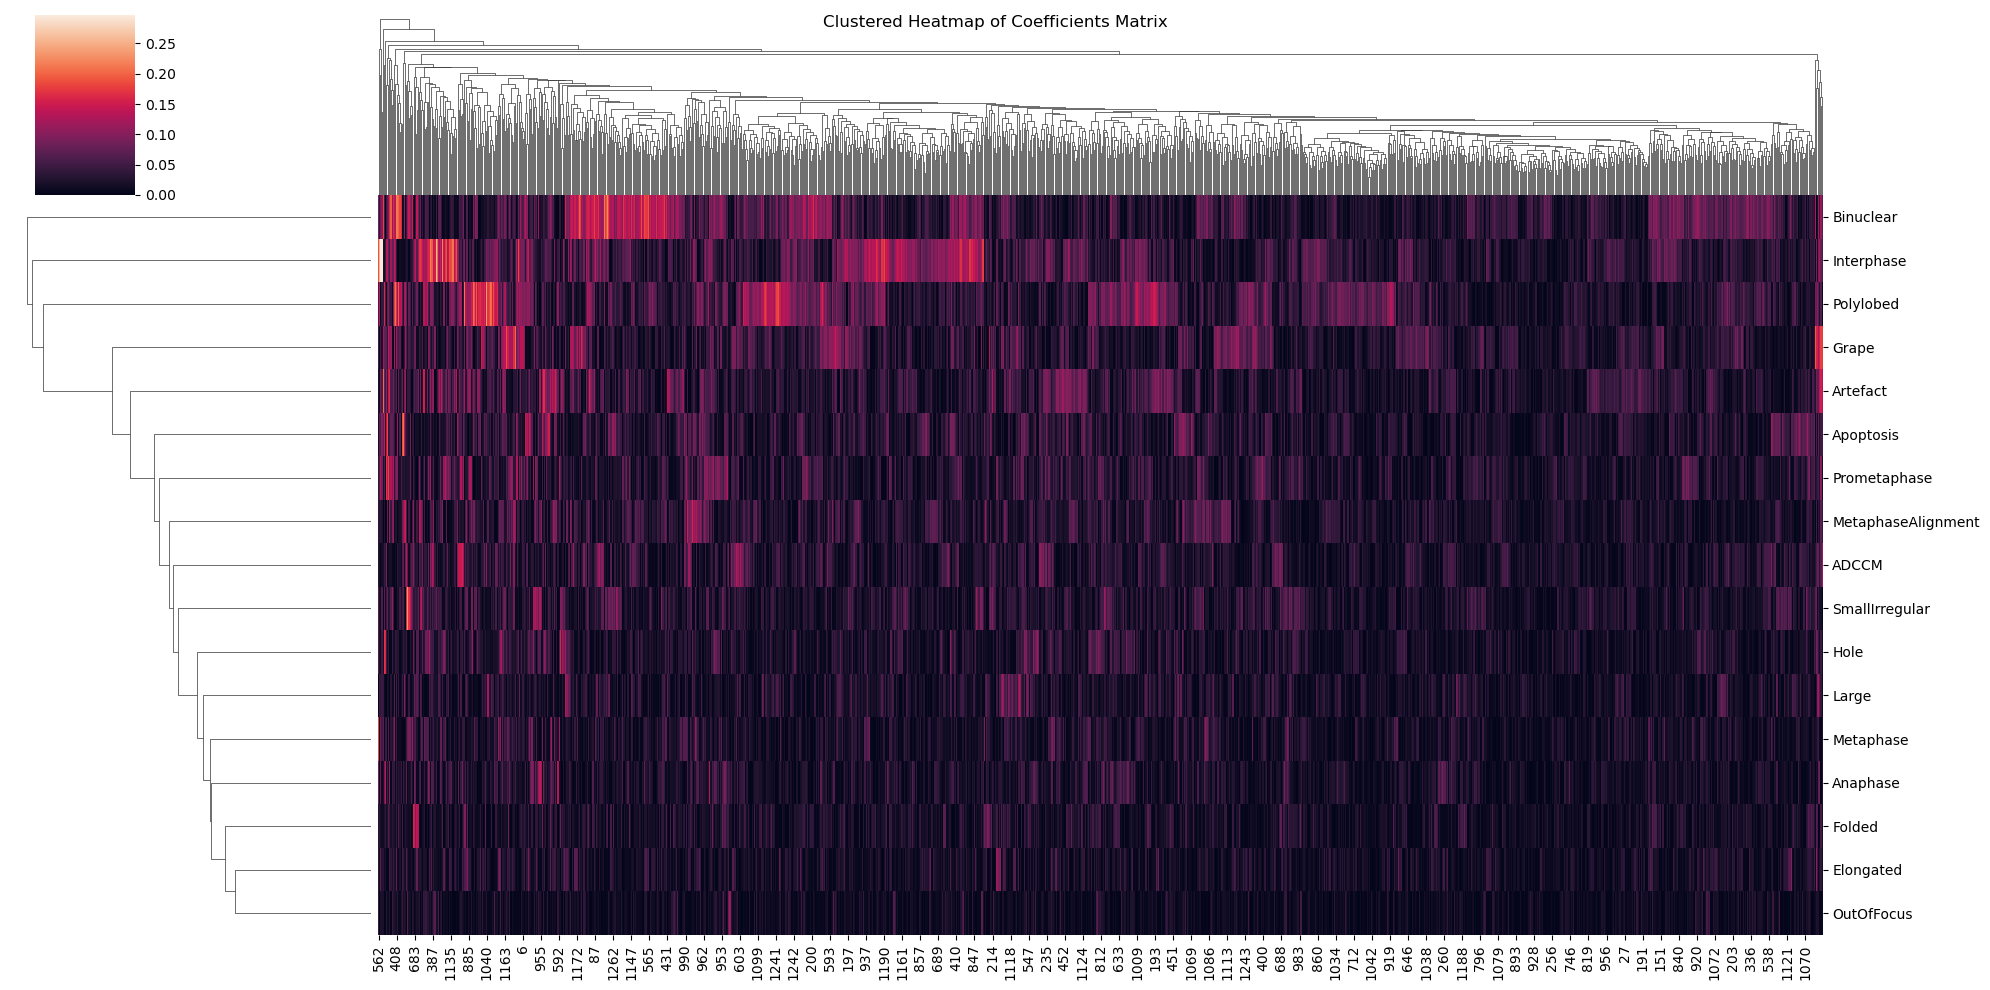

In [5]:
# display clustered heatmap of coefficients
ax = sns.clustermap(data=coefs.T, figsize=(20, 10), row_cluster=True, col_cluster=True)
ax = ax.fig.suptitle("Clustered Heatmap of Coefficients Matrix")

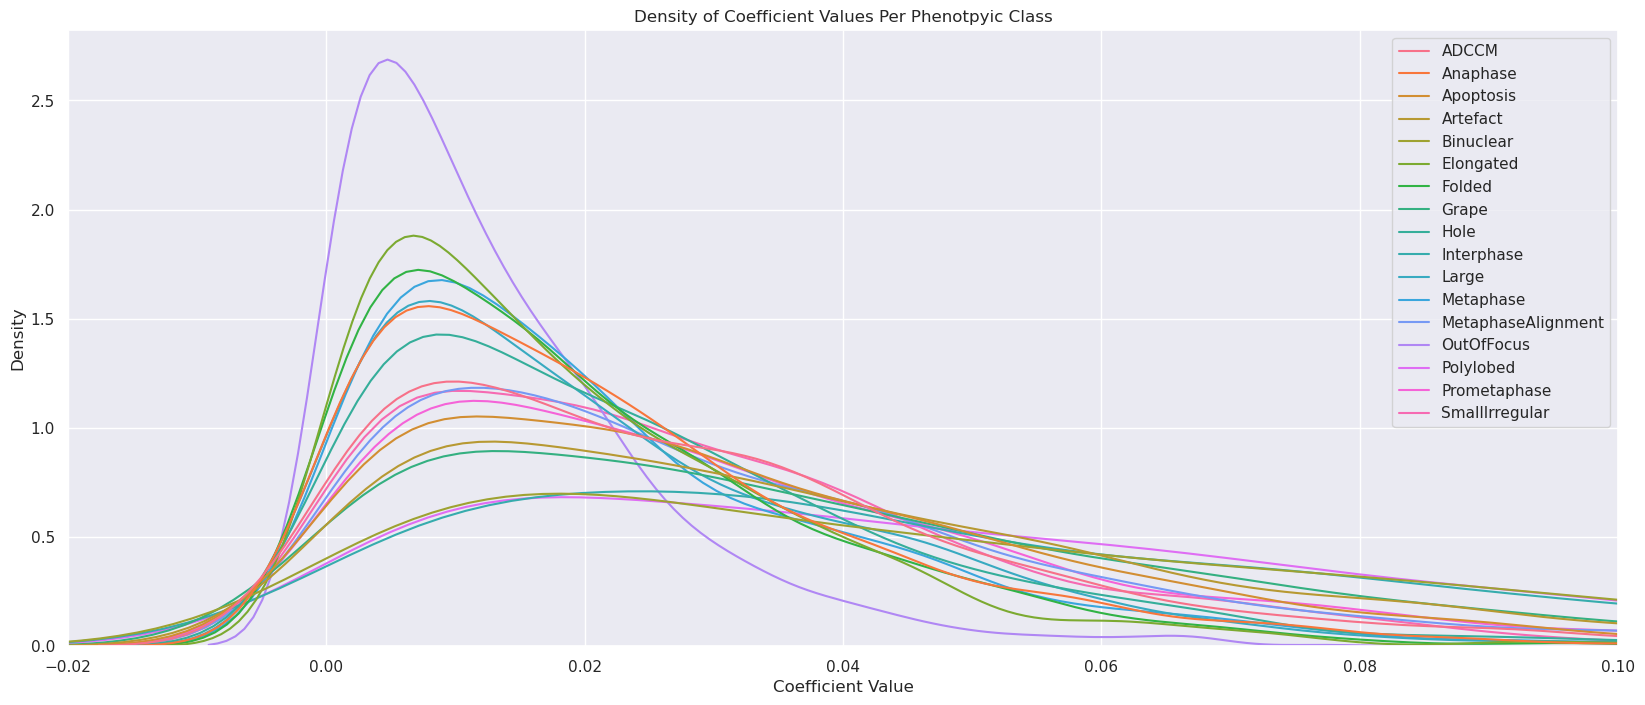

In [6]:
# display density plot for coefficient values of each class
sns.set(rc={"figure.figsize": (20, 8)})
plt.xlim(-0.02, 0.1)
plt.xlabel("Coefficient Value")
plt.ylabel("Density")
plt.title("Density of Coefficient Values Per Phenotpyic Class")
ax = sns.kdeplot(data=coefs)

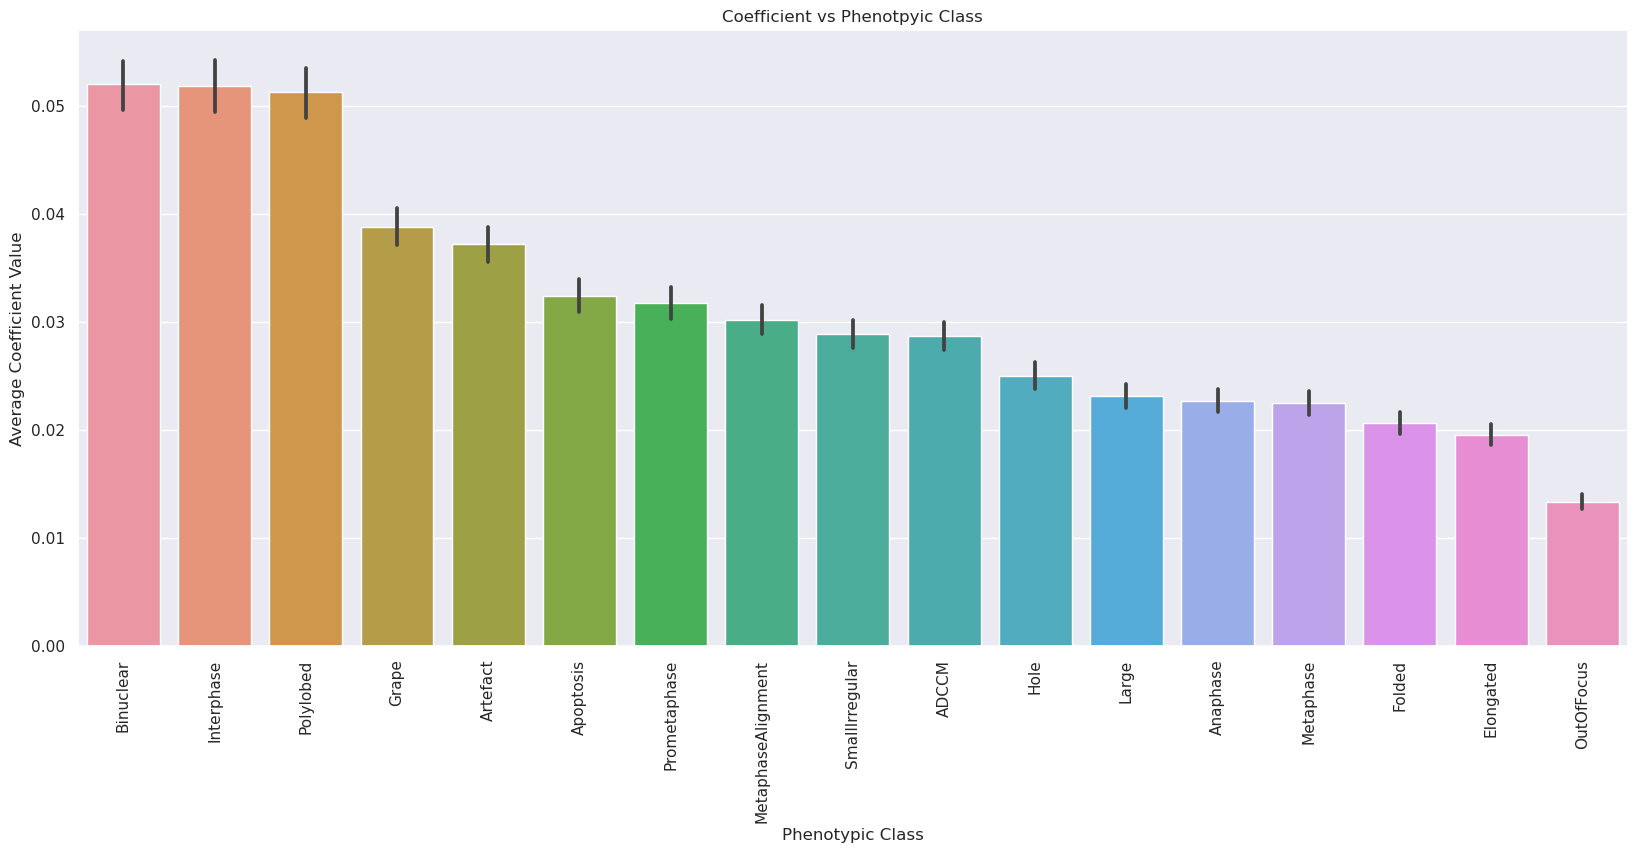

In [7]:
# display average coefficient value vs phenotypic class bar chart
pheno_class_ordered = coefs.reindex(
    coefs.mean().sort_values(ascending=False).index, axis=1
)
sns.set(rc={"figure.figsize": (20, 8)})
plt.xlabel("Phenotypic Class")
plt.ylabel("Average Coefficient Value")
plt.title("Coefficient vs Phenotpyic Class")
plt.xticks(rotation=90)
ax = sns.barplot(data=pheno_class_ordered)

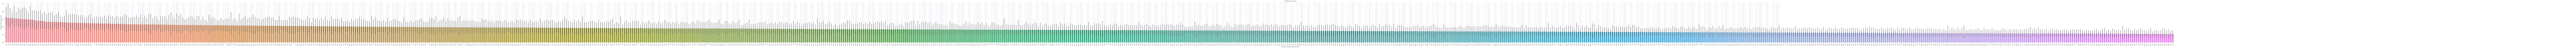

In [8]:
# display average coefficient value vs feature bar chart
feature_ordered = coefs.T.reindex(
    coefs.T.mean().sort_values(ascending=False).index, axis=1
)
sns.set(rc={"figure.figsize": (500, 8)})
plt.xlabel("Deep Learning Feature Number")
plt.ylabel("Average Coefficient Value")
plt.title("Coefficient vs Feature")
plt.xticks(rotation=90)
ax = sns.barplot(data=feature_ordered)

### Interpret shuffled baseline model

In [9]:
shuffled_baseline_log_reg_model_path = pathlib.Path(f"{model_dir}/shuffled_baseline_log_reg_model.joblib")
shuffled_baseline_log_reg_model = load(shuffled_baseline_log_reg_model_path)

### Compile Coefficients Matrix

In [10]:
coefs = np.abs(shuffled_baseline_log_reg_model.coef_)
coefs = pd.DataFrame(coefs).T
coefs.columns = shuffled_baseline_log_reg_model.classes_

print(coefs.shape)
coefs.head()

(1280, 17)


,ADCCM,Anaphase,Apoptosis,Artefact,Binuclear,Elongated,Folded,Grape,Hole,Interphase,Large,Metaphase,MetaphaseAlignment,OutOfFocus,Polylobed,Prometaphase,SmallIrregular
0,0.008114,0.008214,0.016602,0.012054,0.008956,0.006249,0.006118,0.007526,0.003803,0.005519,0.001797,0.002023,0.008613,0.003472,0.006871,0.008237,0.007804
1,0.009588,0.017286,0.005670,0.000839,0.006893,0.003923,0.000861,0.001377,0.012847,0.004729,0.008891,0.004775,0.008993,0.011080,0.026697,0.005106,0.017394
2,0.018260,0.000676,0.007452,0.000263,0.006447,0.003196,0.006600,0.010424,0.006251,0.016440,0.007851,0.008756,0.009163,0.001092,0.018586,0.013993,0.005517
3,0.004008,0.012515,0.017622,0.008535,0.005173,0.002095,0.005454,0.012765,0.005631,0.002002,0.000457,0.014658,0.000041,0.019932,0.022008,0.013879,0.005574
4,0.000636,0.000853,0.001992,0.010629,0.003817,0.002143,0.006208,0.003124,0.011924,0.002117,0.004913,0.005725,0.001208,0.014405,0.013622,0.001142,0.009129


### Diagrams for interpreting coefficients

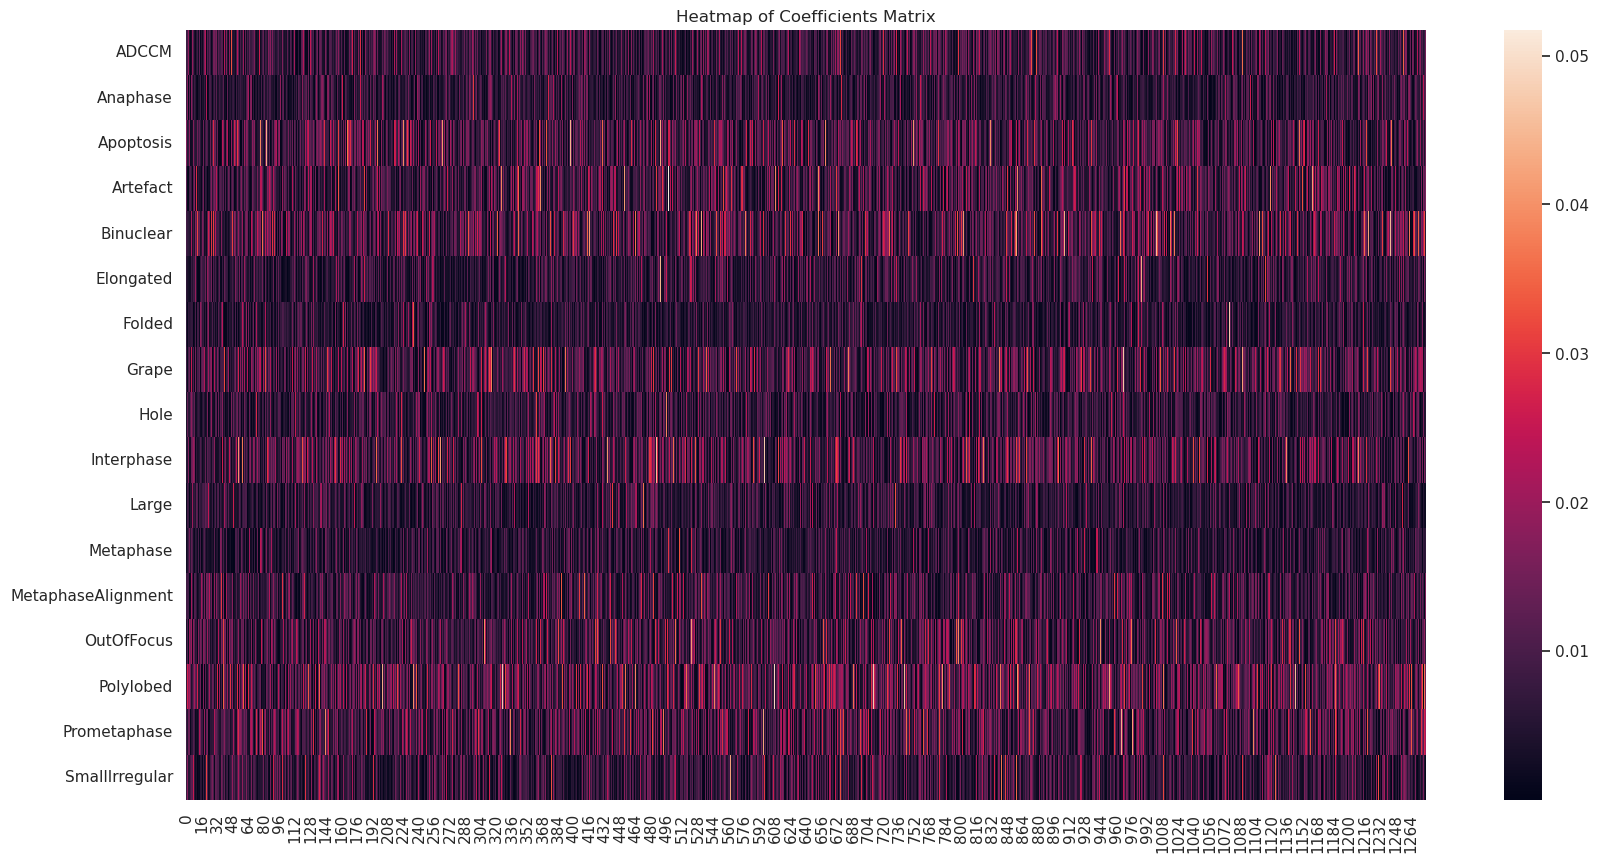

In [11]:
# display heatmap of average coefs
plt.figure(figsize=(20, 10))
plt.title("Heatmap of Coefficients Matrix")
ax = sns.heatmap(data=coefs.T)

/home/roshankern/anaconda3/envs/phenotypic_profiling/lib/python3.8/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


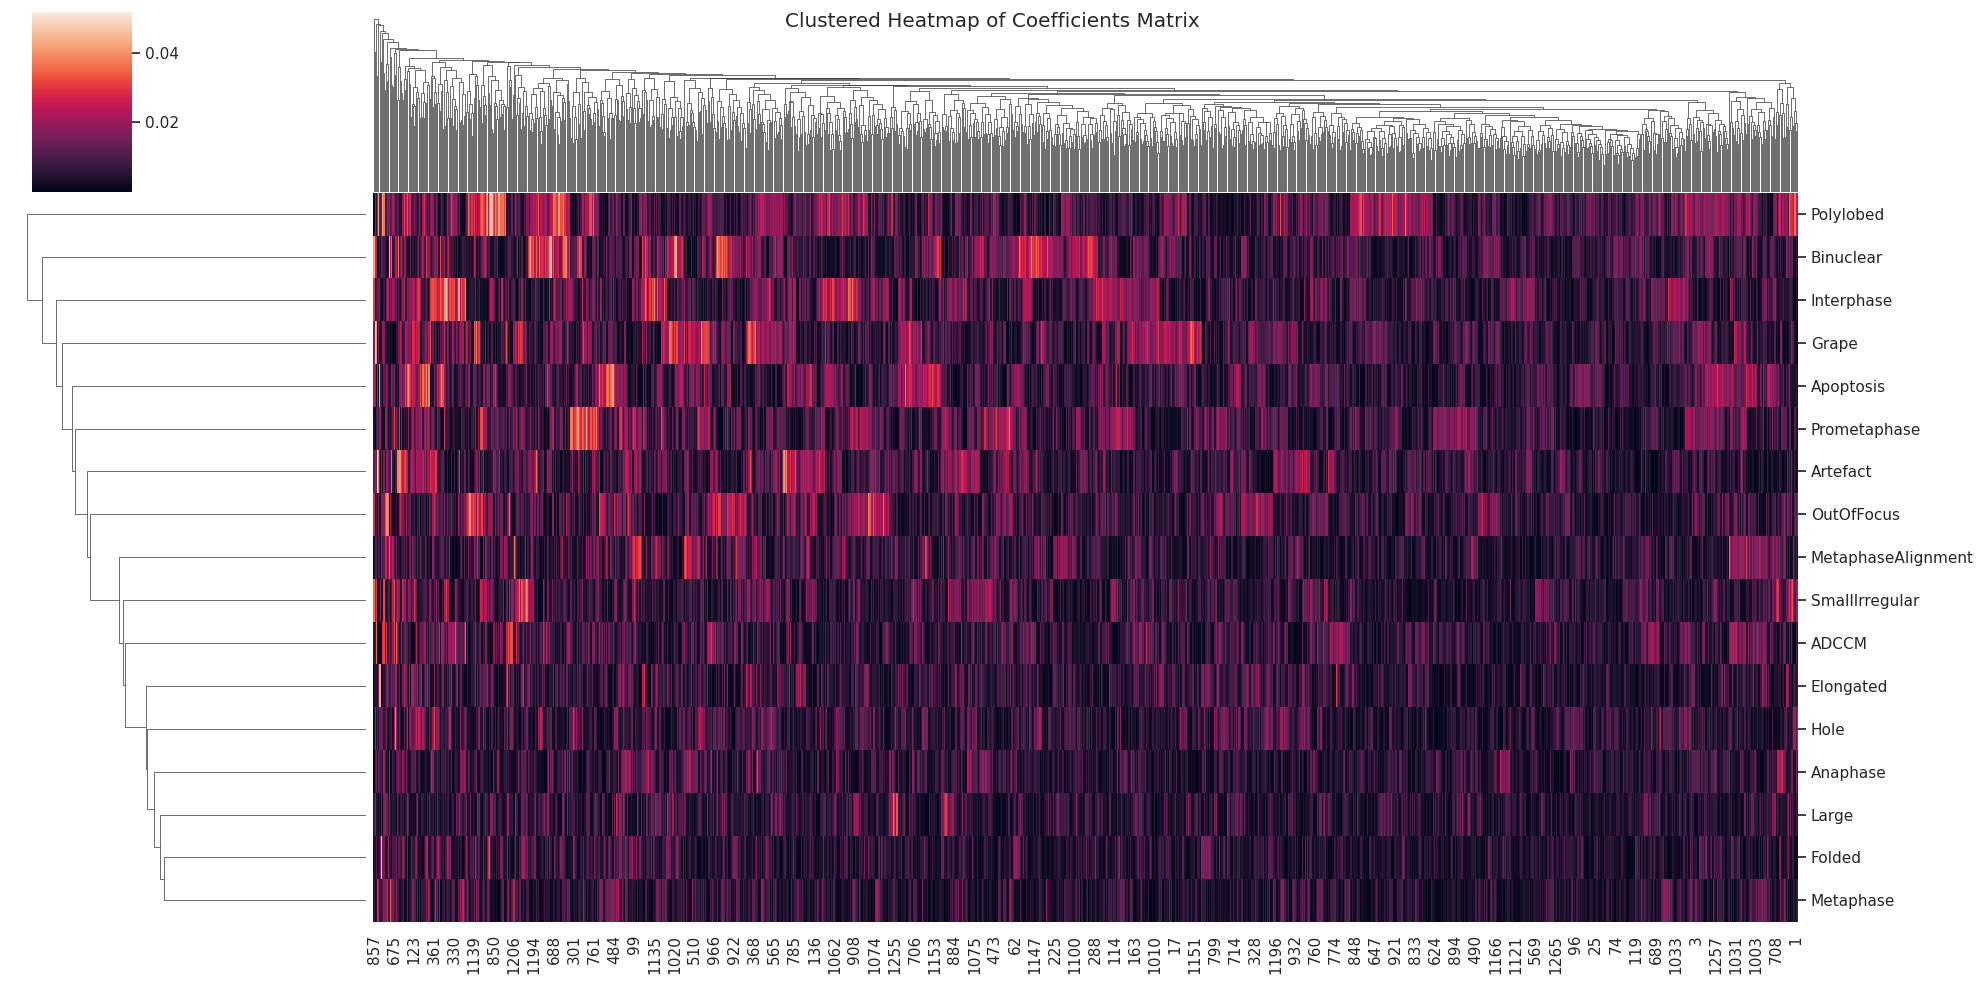

In [12]:
# display clustered heatmap of coefficients
ax = sns.clustermap(data=coefs.T, figsize=(20, 10), row_cluster=True, col_cluster=True)
ax = ax.fig.suptitle("Clustered Heatmap of Coefficients Matrix")

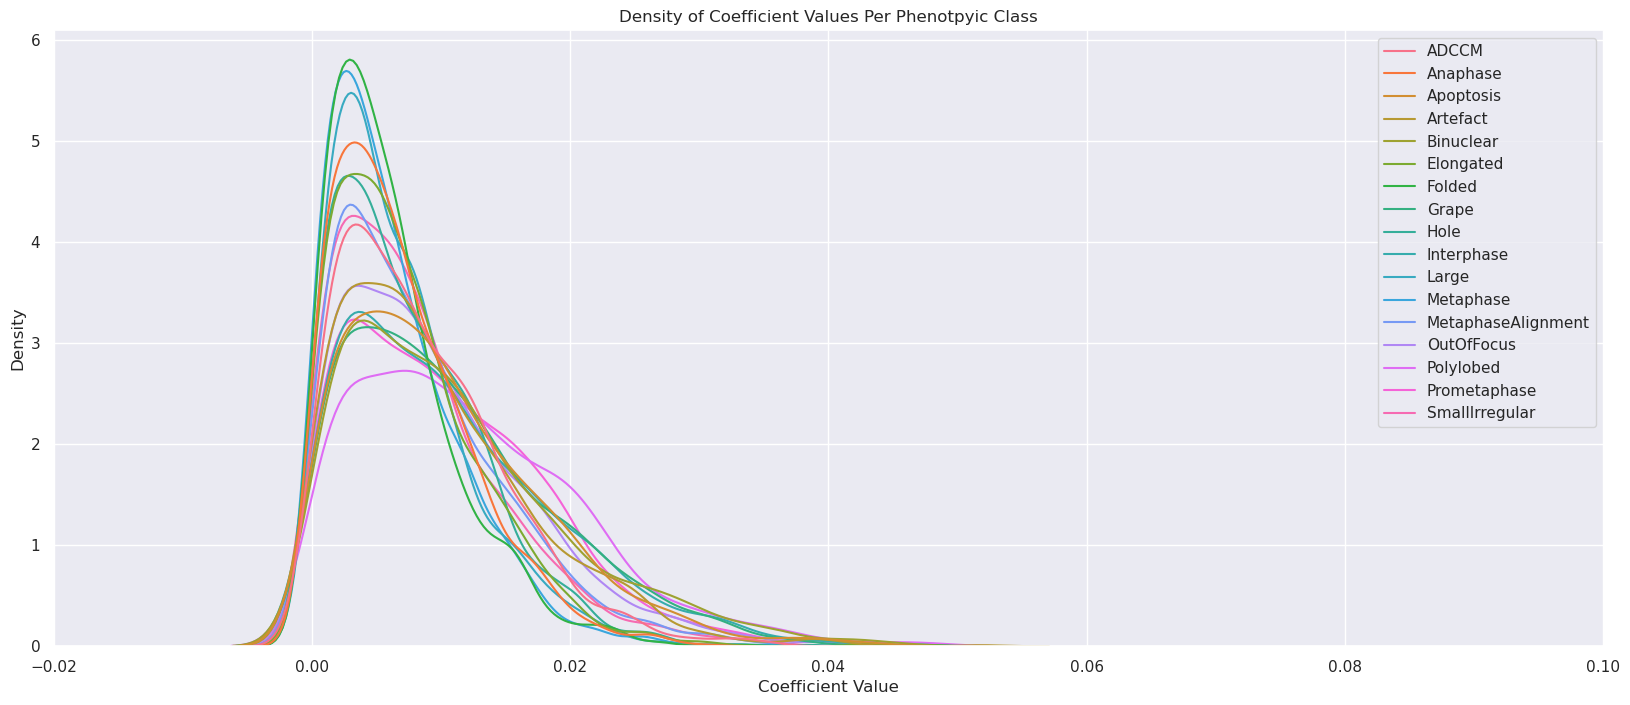

In [13]:
# display density plot for coefficient values of each class
sns.set(rc={"figure.figsize": (20, 8)})
plt.xlim(-0.02, 0.1)
plt.xlabel("Coefficient Value")
plt.ylabel("Density")
plt.title("Density of Coefficient Values Per Phenotpyic Class")
ax = sns.kdeplot(data=coefs)

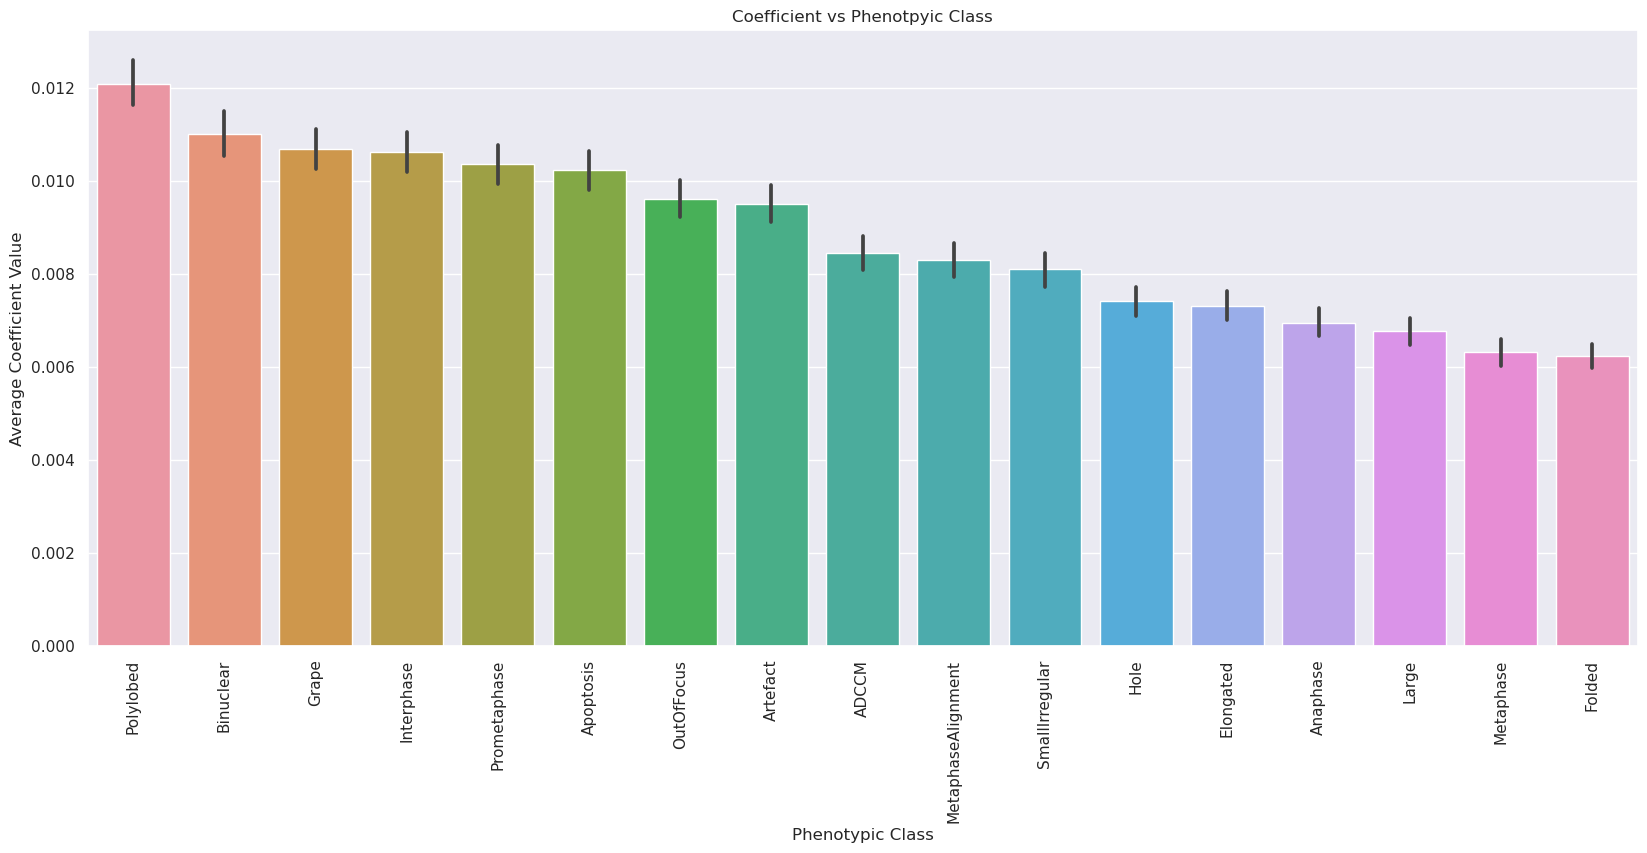

In [14]:
# display average coefficient value vs phenotypic class bar chart
pheno_class_ordered = coefs.reindex(
    coefs.mean().sort_values(ascending=False).index, axis=1
)
sns.set(rc={"figure.figsize": (20, 8)})
plt.xlabel("Phenotypic Class")
plt.ylabel("Average Coefficient Value")
plt.title("Coefficient vs Phenotpyic Class")
plt.xticks(rotation=90)
ax = sns.barplot(data=pheno_class_ordered)

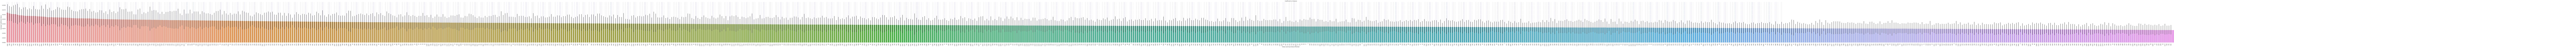

In [15]:
# display average coefficient value vs feature bar chart
feature_ordered = coefs.T.reindex(
    coefs.T.mean().sort_values(ascending=False).index, axis=1
)
sns.set(rc={"figure.figsize": (500, 8)})
plt.xlabel("Deep Learning Feature Number")
plt.ylabel("Average Coefficient Value")
plt.title("Coefficient vs Feature")
plt.xticks(rotation=90)
ax = sns.barplot(data=feature_ordered)